# Problem Set 4 - Thomas Vandal

## Problem 1
We are looking for gravitational waves in LIGO data. Below is a step by step procedure with a description and answers for all sections of the problem (a to e). The functions implemented for each step are stored in $\texttt{utils.py}$ and explicitely referenced in the answers. Otherwise the notebook was too long and confusing. Using the functions implemented to answer each questions, I implemented the $\texttt{find\_gw}$ method, which can be found in the $\texttt{gravwaves.py}$ file. For each sub-question, I also give comment the result for all 4 events analyzed. The corresponding plots and figures can be found at the end of the notebook, where I ran $\texttt{find\_gw}$ for each event, speparately.

### Load data
First, I implemented a method to load the specific information we need about a given event. This method, $\texttt{load\_event}$, relies on $\texttt{read\_ligo.py}$ (slightly modified version of provided script) to extract time values (which are the same for all timeseries), sampling rate, strain data, and signal template.

In [1]:
# package to handle json files
import json

# set data dir and event list
datadir = './ligo_data/'  # DIRECTORY CONTAINING THE DATA
eventlist = ['GW150914', 'GW151226', 'GW170104', 'LVT151012']

# load json file with general info
filejson = ''.join([datadir, 'BBH_events_v3.json'])
events = json.load(open(filejson, 'r'))

As we see below, the data can look a bit different from one detector to another, but the always look basically like noise. The signal is very clear in the templates, however.

### Part (a): Noise Model
The noise model will consist of a power spectrum density (PSD). Here, we use an FFT to get a power spectrum of the data, which can be used as a noise model. To smooth the power spectrum, we use a Gaussian filter with $\sigma = 1$, which removes some very small, repetitive lines and makes the spectrum easier to deal with. To window the data, we used a [blackman window](https://docs.scipy.org/doc/numpy/reference/generated/numpy.blackman.html), since it showed better performance than the usual sine (or cosine) window that we used in class. The idea of using that window came from the LIGO tutorials available with the data. To use this window, we simply multiply it by the data before taking the FT, which we then normalize. The details of this step are given in $\texttt{utils.powerspec}$.

As shown below, the noise model we get is reasonably detailed, but also a bit smoother than it would be if no filter had been applied. Note that the plot is shown only in more interesting frequency range (~20, ~2000).

### Part (b): Matched Filter
Here, we define a method to perform matched filtering between the template of the signal and the data. Note that throughout this problem, we always assume the noise to be Gaussian and stationary. Using the data and the signal template provided, we simpy use the equation
$$
m = \frac{\text{IFT}\left[\text{FT}(N^{-1/2} A)^* \ \text{FT}(N^{-1/2} d)\right]}{\text{FT}(N^{-1/2} A)^* \ \text{FT}(N^{-1/2} A)}
$$
to evaluate the correlation between the signal template and the data, where $d$ is the data, $A$ the template, and $N$ the noise. An FFT shift is then needed to center the filter around the peak ($\texttt{np.fft.fftshift}$ works fine). This is peformed by $\texttt{utils.matchfilt}$.

As shown below, there is now a clear peak in the data, and the shape of the window is also very visible.

### Part (c): Signal to Noise Ratio (SNR)
Using the matched filter output, the template, and the noise, we get that
$$
\text{SNR} = m \sqrt{\text{FT}(N^{-1/2} A)^* \ \text{FT}(N^{-1/2} A)}.
$$
From this, we have an estimate of how strong the signal (peak) we see in the matched filter output is compared to the noise. We obtain the SNR with $\texttt{utils.get\_snr}$.

We see below that the peaks are clear in all the SNR plots (individual and combined). For some events, the SNR at one of the detectors is significantly weaker than the other. This could mean that for some reason, there was more noise at one detector than the other, or that the signal was measured with a smaller amplitude.


### Part (d): Analytic SNR
Here, we use the signal template and the noise model to analytic expected SNR, which is basically the signal template divided by the noise amplitude (ASD). The analytic SNR is obtained using $\texttt{utils.expect\_snr}$.

As we see below, in most cases, at least one of the SNR peaks (H1 or L1) has a smaller value than the analytic prediction. This might be due to the fact that the noise is not totally Gaussian stationary, and so our assumption is broken.

### Part (e): Half Weight frequency
We first obtain a power spectrum of the whitened template, using our noise model. Then, we perform a cumulative sum. This gives the weight accumulated at each frequency. It is clear that the last frequency will have the total (maximum) weight, so we can use this to find the frequency at which the cumulative sum is the closest to half of the total weight. To find this frequency, we use $\texttt{utils.get\_hf}$.

The value of the frequency is given for both detector for each event in the results below.

### Part (f): Time of Arrival
Here, we fit a Gaussian distribution to a subsection of the SNR (near the peak) to find the time uncertainty of each peak (i.e. of each time of arrival). The paramter sigma (s) of the Gaussian profile ($\texttt{utils.gauss}$) gives the time uncertainty. Since fitting the SNR timeseries with a Gaussian did not work well (due to the limited number of points and complicated shape), I used the maximum of the SNR as the amplitude, and the corresponding time value as the time of arrival (mean of the Gaussian). The only free parameter will therefore be the standard deviation (i.e. the error in the time of arrival). This allows us to constrain the uncertainty in time using $\texttt{utils.toa}$. This function gives the times of arrival and their error, so we could use this to find the approximate positional (angle) uncertainty:
$$
\delta \theta = \frac{c \Delta t}{d},
$$
where $\Delta t$ is the difference between the times of arrival at the two observatories, and $d \approx 3000$ km is the distance between them (and $c$ is speed of light in vacuum). This last part is computed directly in $\texttt{gravwaves.find\_gw}$.

For each event, the time of arrival (with uncertainty) is given for both detectors. From this, we get an approximate uncertainty in position for each event.

### Results for Problem 1
The results to all sections are given below, event by event. The events are separated by a dashed line.

EVENT GW150914
DATA OVERVIEW


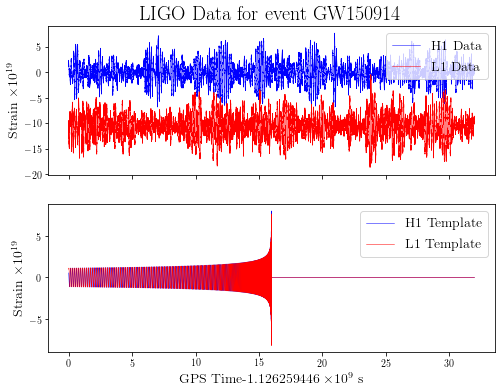



(a) NOISE MODEL


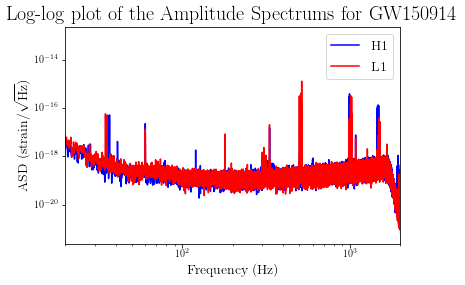



(b) MATCHED FILTER


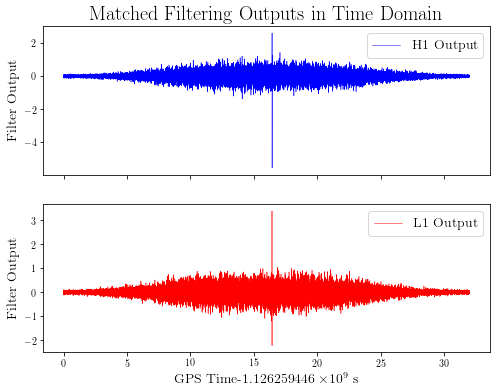



(c) SNR
Max SNR H1: 13.2254
Max SNR L1: 5.7556
Max SNR (total): 13.2970


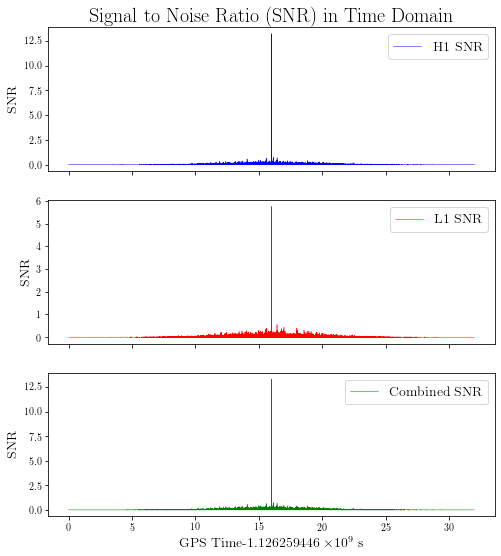



(d) ANALYTIC SNR
Max SNR H1: 14.0245
Max SNR L1: 13.8741
Max SNR (total): 14.3212


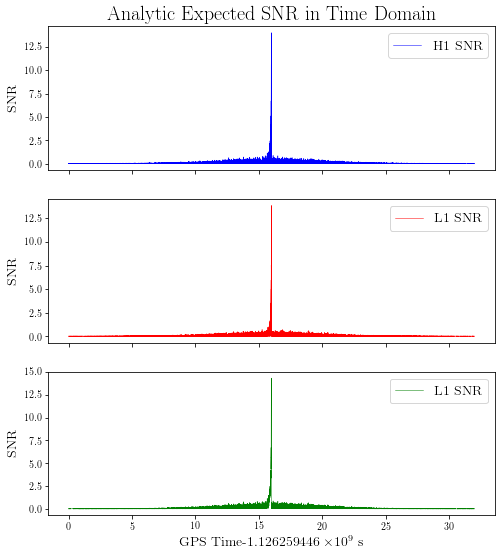



(e) HALF POWER FREQUENCY
Half frequency for H1: 101.0 Hz
Half frequency for L1: 115.28125 Hz


(f) TIME OF ARRIVAL
H1 time of arrival: 1126259461.9995117 ± 0.0007586990627662997
L1 time of arrival: 1126259462.0004883 ± 0.0006018903468876793
Typical positional uncertainty: 0.09765625 rad


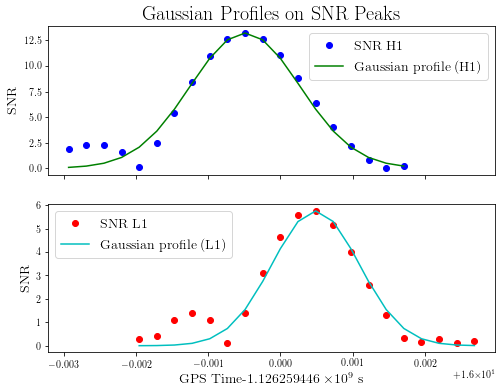

----------------------------------------------------------------------------
EVENT GW151226
DATA OVERVIEW


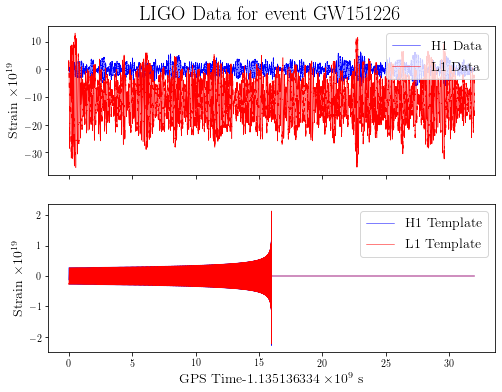



(a) NOISE MODEL


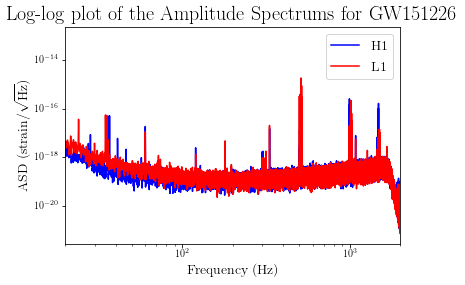



(b) MATCHED FILTER


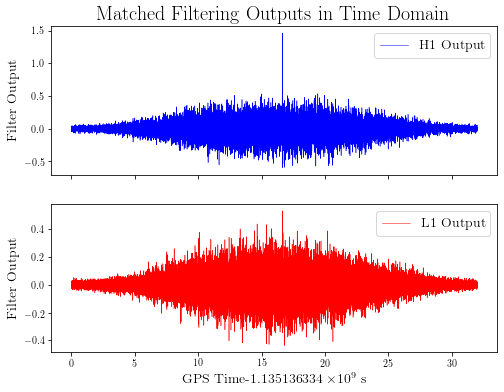



(c) SNR
Max SNR H1: 4.3798
Max SNR L1: 0.8292
Max SNR (total): 4.4292


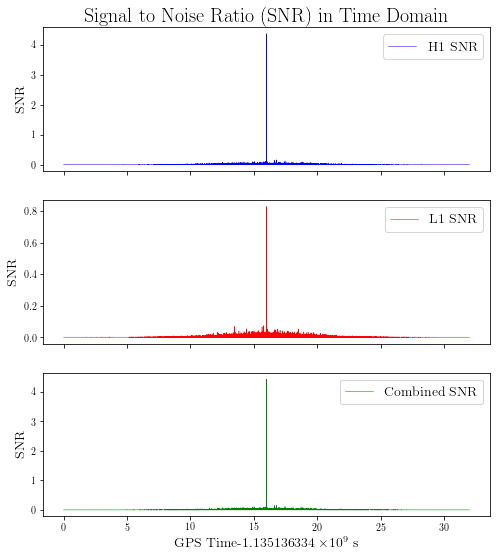



(d) ANALYTIC SNR
Max SNR H1: 3.1863
Max SNR L1: 3.1053
Max SNR (total): 3.2546


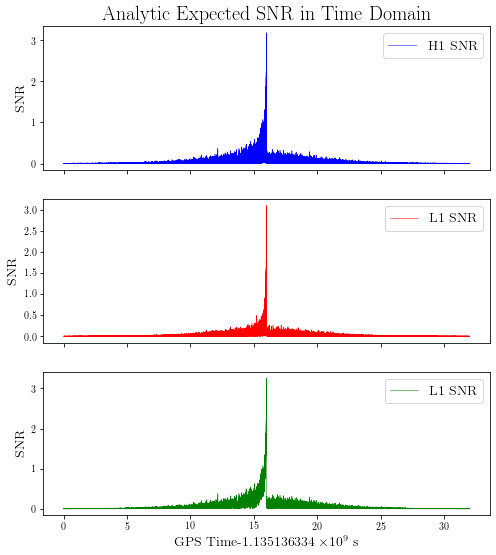



(e) HALF POWER FREQUENCY
Half frequency for H1: 75.9375 Hz
Half frequency for L1: 107.28125 Hz


(f) TIME OF ARRIVAL
H1 time of arrival: 1135136350.0 ± 0.0008446534550624133
L1 time of arrival: 1135136349.9997559 ± 0.0002694410961091247
Typical positional uncertainty: 0.0244140625 rad


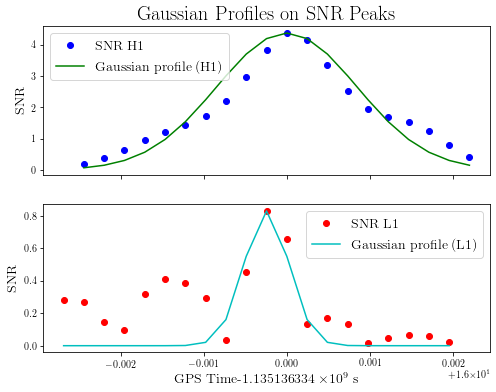

----------------------------------------------------------------------------
EVENT GW170104
DATA OVERVIEW


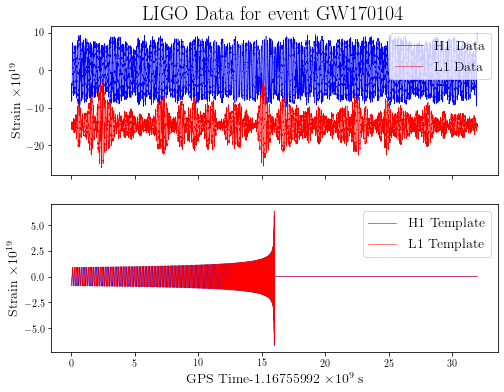



(a) NOISE MODEL


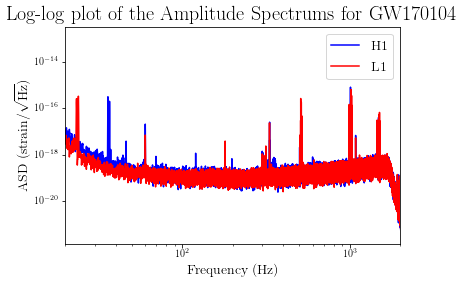



(b) MATCHED FILTER


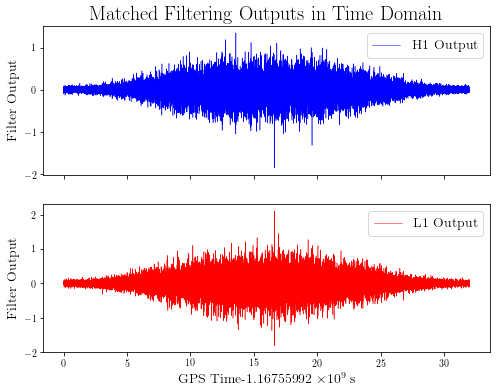



(c) SNR
Max SNR H1: 4.1823
Max SNR L1: 12.4594
Max SNR (total): 12.4632


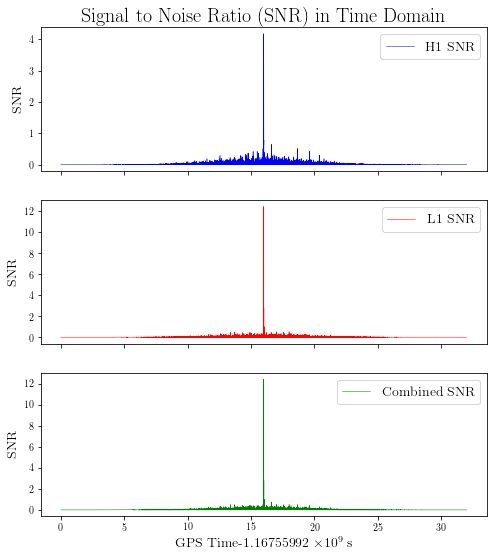



(d) ANALYTIC SNR
Max SNR H1: 12.0196
Max SNR L1: 12.6820
Max SNR (total): 12.7297


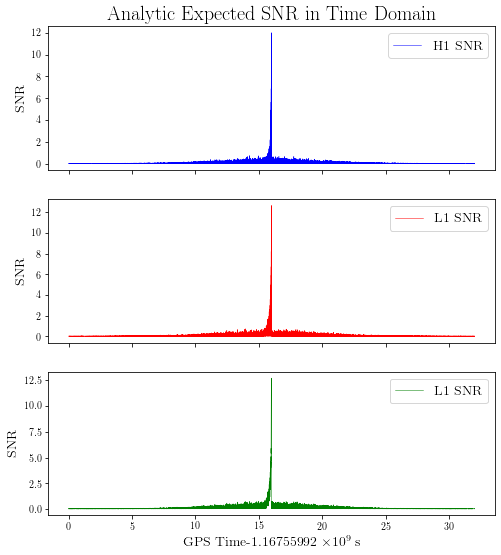



(e) HALF POWER FREQUENCY
Half frequency for H1: 93.90625 Hz
Half frequency for L1: 76.84375 Hz


(f) TIME OF ARRIVAL
H1 time of arrival: 1167559935.9990234 ± 0.0005537985495568558
L1 time of arrival: 1167559935.9997559 ± 0.0009507668845189533
Typical positional uncertainty: 0.0732421875 rad


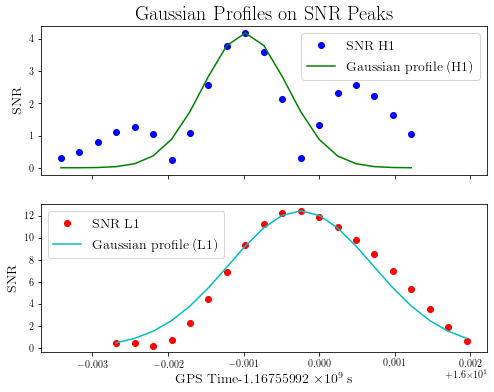

----------------------------------------------------------------------------
EVENT LVT151012
DATA OVERVIEW


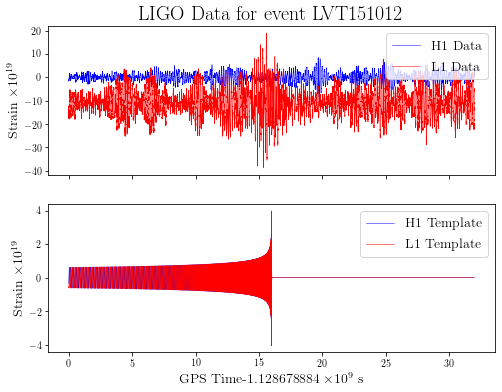



(a) NOISE MODEL


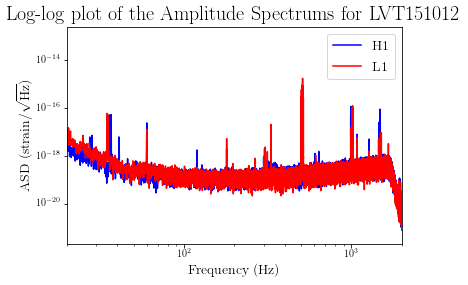



(b) MATCHED FILTER


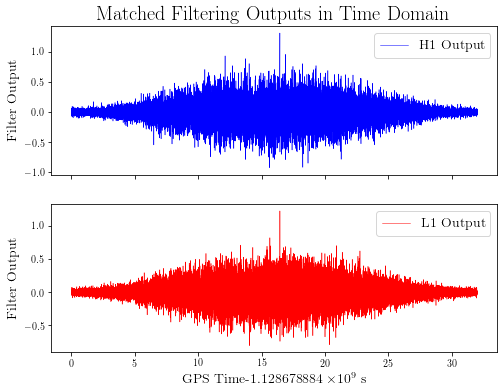



(c) SNR
Max SNR H1: 7.0046
Max SNR L1: 3.5786
Max SNR (total): 7.8099


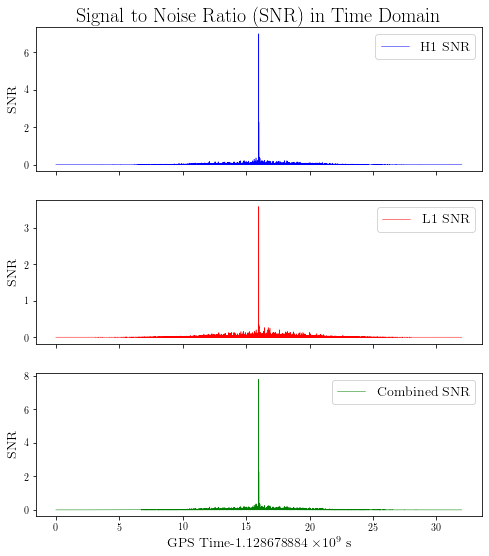



(d) ANALYTIC SNR
Max SNR H1: 6.8243
Max SNR L1: 6.8921
Max SNR (total): 7.0519


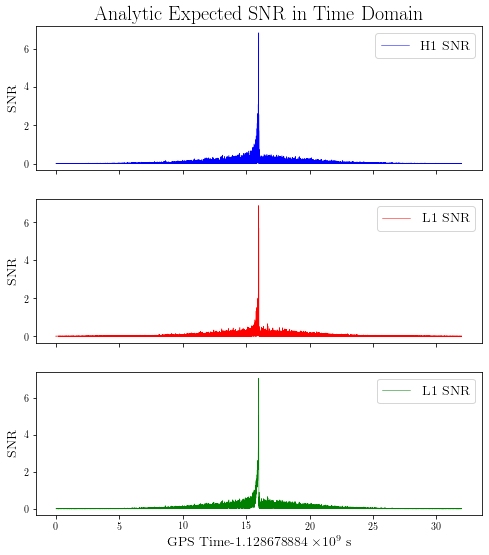



(e) HALF POWER FREQUENCY
Half frequency for H1: 75.90625 Hz
Half frequency for L1: 94.3125 Hz


(f) TIME OF ARRIVAL
H1 time of arrival: 1128678899.9992676 ± 0.0005685142354181563
L1 time of arrival: 1128678899.9995117 ± 0.0007722829368088206
Typical positional uncertainty: 0.0244140625 rad


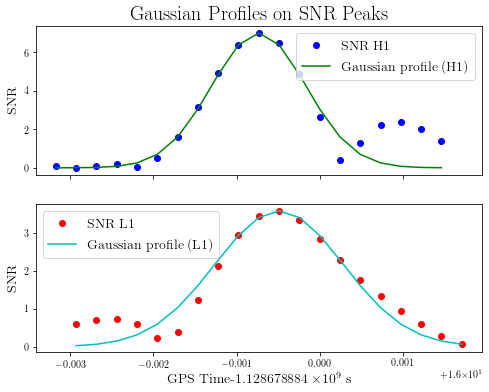

----------------------------------------------------------------------------


In [2]:
import gravwaves as gw
%matplotlib inline

for eventname in eventlist:
    print('EVENT {}'.format(eventname))
    gw.find_gw(events, eventname, datadir)
    print('----------------------------------------------------------------------------')